#### Задание 1: На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, pi

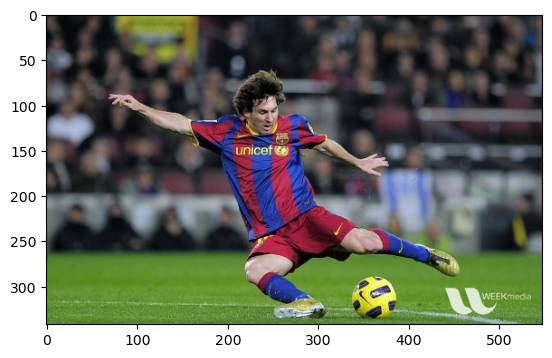

In [2]:
img = cv2.imread("messi5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(342, 548, 3)


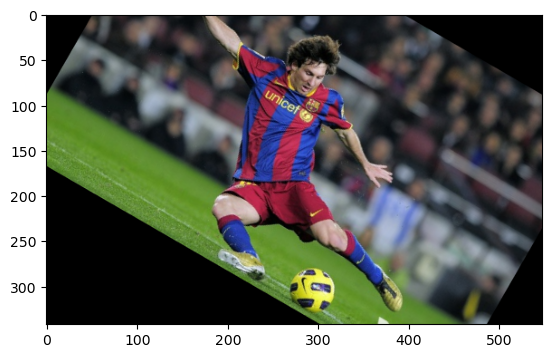

In [3]:

height, width = img.shape[:2]
angle = 30 * pi / 180
M1 = np.float32([
    [cos(angle), -sin(angle), width/2*sin(angle)],
    [sin(angle), cos(angle), -height/2*cos(angle)]]
)

img_res = cv2.warpAffine(img, M1, (int(width), int(height)))

plt.imshow(img_res)
print(img_res.shape)

### Задание 2: В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).


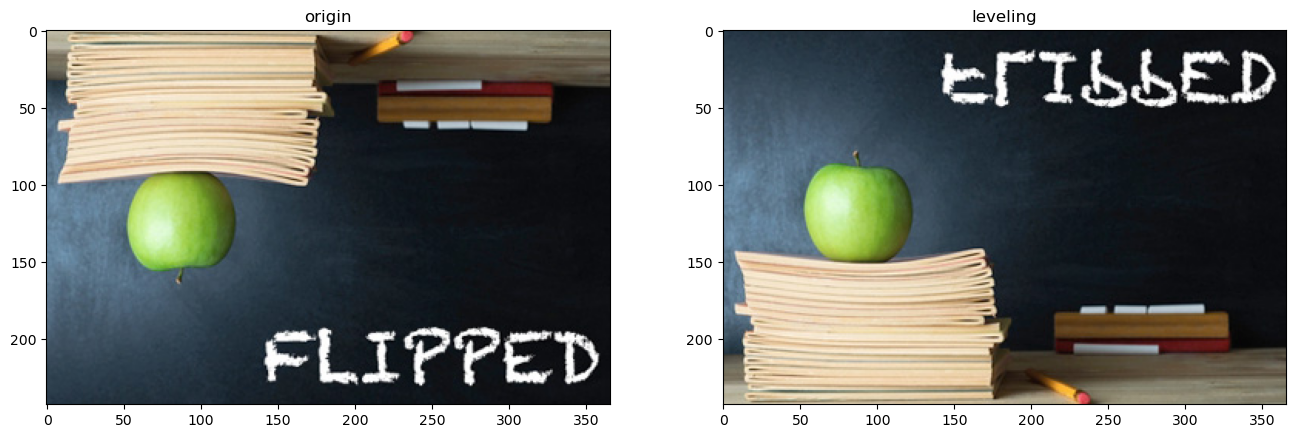

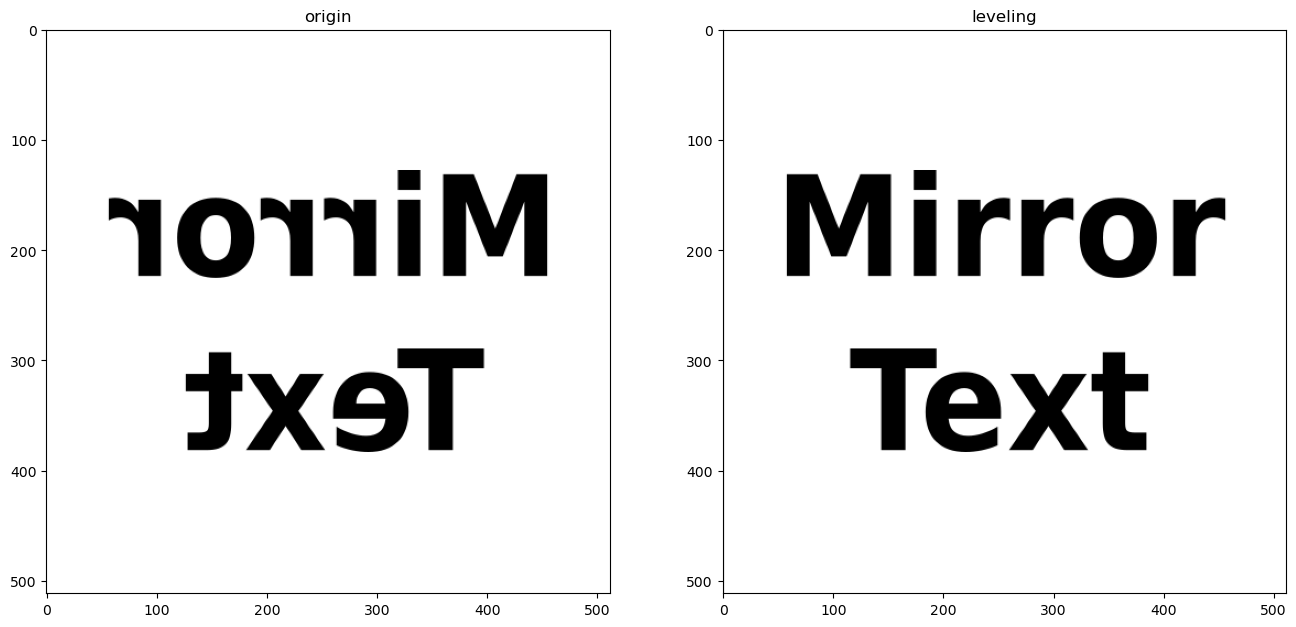

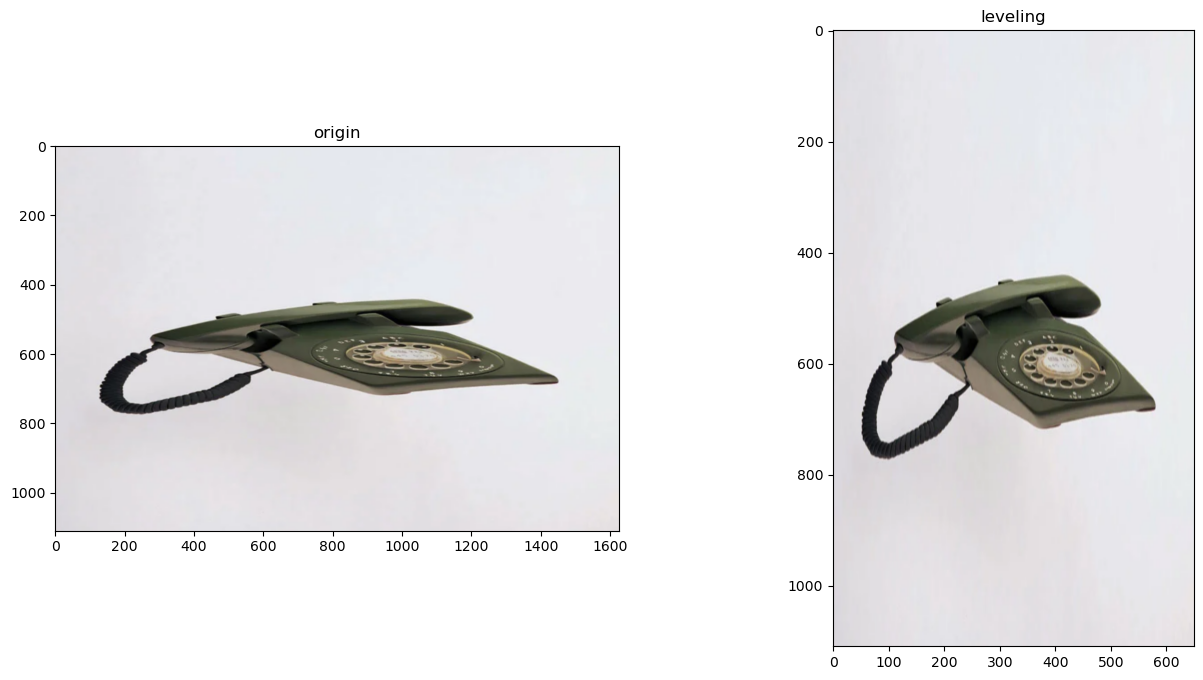

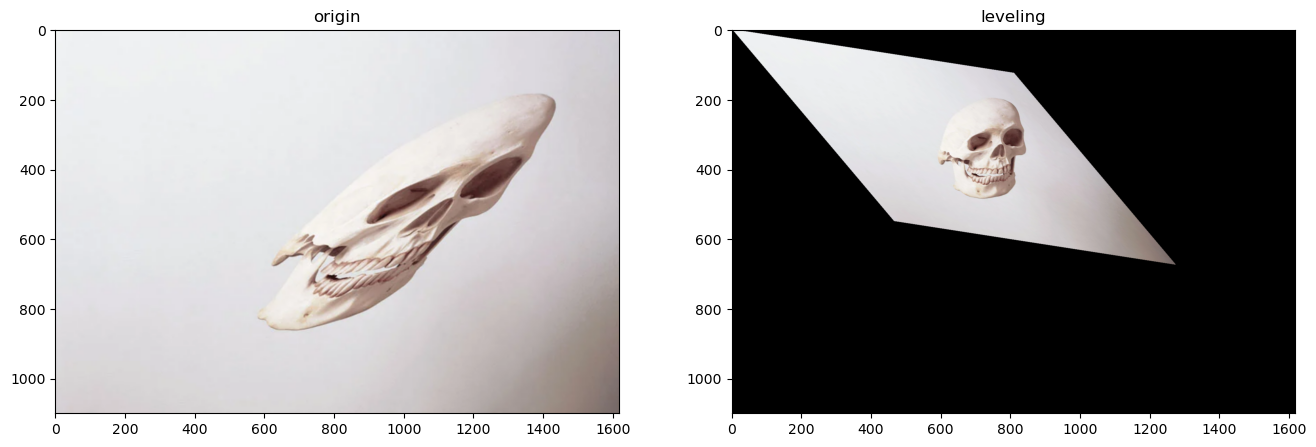

In [4]:
img1 = cv2.cvtColor(cv2.imread("apple.jpg"), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread("text.png"), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread("phone.png"), cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(cv2.imread("skull.png"), cv2.COLOR_BGR2RGB)
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
height3, width3 = img3.shape[:2]
height4, width4 = img4.shape[:2]
M1 = np.float32([[1, 0, 0],[0,-1, height1]])
M2 = np.float32([[-1, 0, width2],[0, 1, 0]])
M3 = np.float32([[0.4, 0, 0],[0, 1, 0]])
angle = -25 * pi / 180
M4 = np.float32([
    [0.5, -sin(angle), 0],
    [0.5 + sin(angle), 0.5, 0],
]
)
img1_res = cv2.warpAffine(img1, M1, (int(width1), int(height1)))
img2_res = cv2.warpAffine(img2, M2, (int(width2), int(height2)))
img3_res = cv2.warpAffine(img3, M3, (int(width3*0.4), int(height3)))
img4_res = cv2.warpAffine(img4, M4, (int(width4), int(height4)))

plt.figure(figsize=(16, 8)) 
plt.subplot(121), plt.imshow(img1), plt.title('origin')
plt.subplot(122), plt.imshow(img1_res), plt.title('leveling')
plt.show()
plt.figure(figsize=(16, 8)) 
plt.subplot(121), plt.imshow(img2), plt.title('origin')
plt.subplot(122), plt.imshow(img2_res), plt.title('leveling')
plt.show()
plt.figure(figsize=(16, 8)) 
plt.subplot(121), plt.imshow(img3), plt.title('origin')
plt.subplot(122), plt.imshow(img3_res), plt.title('leveling')
plt.show()
plt.figure(figsize=(16, 8)) 
plt.subplot(121), plt.imshow(img4), plt.title('origin')
plt.subplot(122), plt.imshow(img4_res), plt.title('leveling')
plt.show()